In [1]:
%load_ext autoreload
%autoreload 2

### Testing trained models

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from pathlib import Path

sys.path.append(str(Path(".").resolve().parent))

2025-05-08 16:33:15.513146: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 16:33:15.516517: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 16:33:15.526375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746714795.543633   27780 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746714795.548593   27780 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746714795.560995   27780 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

#### Import trained model

In [3]:
model_path_1 = Path("../models/unet_T1_invivo_v1.model.keras")

In [ ]:
def load_model(path=None):
    if path == None:
        print("specify path first")
        return
    return keras.models.load_model(path, compile=True)

In [5]:
model = load_model(model_path_1)

2025-05-08 16:33:55.112738: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


#### Import training data

In [2]:
import pickle
with open("../data/processed/pkls/T1_invivo_data.pkl", "+br") as p_in:
    data = pickle.load(p_in)

In [4]:
data["seq_test"].shape

(48, 192, 192, 1)

In [8]:
predictions = model.predict(data["seq_test"])

2025-05-08 16:35:34.735466: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-08 16:35:34.901728: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-08 16:35:39.229154: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-08 16:35:40.256699: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-05-08 16:35:40.495431: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 603979776 exceeds 10% of free system memory.


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step


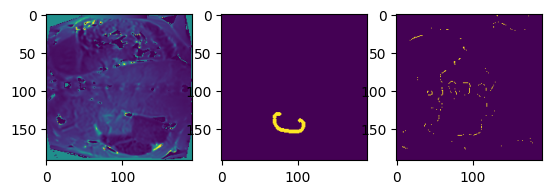

In [83]:
from random import randint
r_choice = randint(0, len(predictions)-1)

t = predictions[r_choice].max() * .80
above_t = predictions[r_choice] > t
mt = np.zeros_like(predictions[r_choice])
mt[above_t] = 1
# Plotting
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(data["seq_test"][r_choice])
axarr[1].imshow(data["seg_test"][r_choice])
axarr[2].imshow(mt)
plt.show()